In [1]:
# model_trainer.py
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib

# Load and prepare data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
cols = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", 
        "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
data = pd.read_csv(url, names=cols, na_values="?").dropna()
data['target'] = data['target'].apply(lambda x: 1 if x > 0 else 0)

# Train model
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

# Save model
joblib.dump(model, 'heart_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("Model trained and saved successfully!")

Model trained and saved successfully!


In [3]:
pip install streamlit scikit-learn joblib numpy matplotlib pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install streamlit-extras Pillow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install --upgrade streamlit


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.8 MB 2.1 MB/s eta 0:00:05
   --- ------------------------------------ 0.8/9.8 MB 1.5 MB/s eta 0:00:06
   --- ------------------------------------ 0.8/9.8 MB 1.5 MB/s eta 0:00:06
   ---- ----------------------------------- 1.0/9.8 MB 1.2 MB/s eta 0:00:08
   ----- ---------------------------------- 1.3/9.8 MB 1.1 MB/s eta 0:00:08
   ------ --------------------------------- 1.6/9.8 MB 1.1 MB/s eta 0:00:08
   ------ --------------------------------- 1.6/9.8 MB 1.1 MB/s eta 0:00:08
   ------- -------------------------------- 1.8/9.8 MB 996.7 kB/s eta 0:00:09
   ------- -------------------------------- 1.8/9.8 MB 996.7 kB/s eta 0:00:09
   ------- -------------------------------- 1.8/9.8 MB 996.7 kB/s eta 0:00:09
   -------- ------

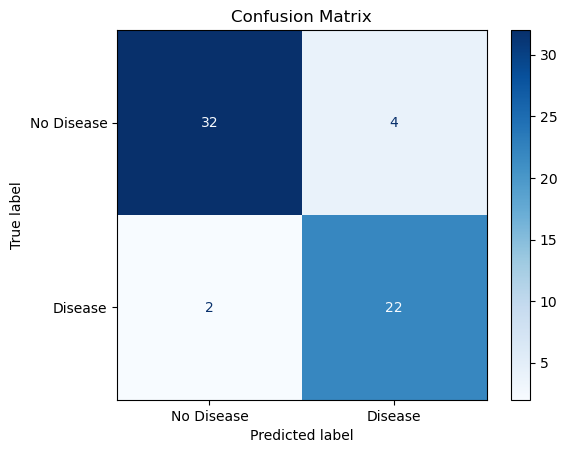

In [4]:
import joblib
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load saved model and scaler
model = joblib.load('heart_model.pkl')
scaler = joblib.load('scaler.pkl')

# Reload the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
cols = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", 
        "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
data = pd.read_csv(url, names=cols, na_values="?").dropna()
data['target'] = data['target'].apply(lambda x: 1 if x > 0 else 0)

# Prepare test data
X = data.drop('target', axis=1)
y = data['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transform test data with the loaded scaler
X_test_scaled = scaler.transform(X_test)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Disease", "Disease"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


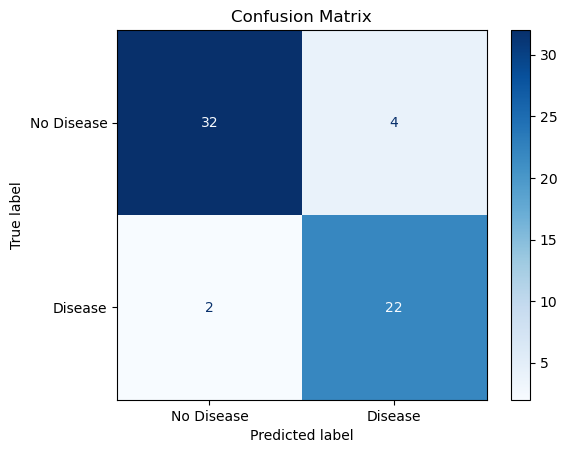

In [4]:
import joblib
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load saved model and scaler
model = joblib.load('heart_model.pkl')
scaler = joblib.load('scaler.pkl')

# Reload the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
cols = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", 
        "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
data = pd.read_csv(url, names=cols, na_values="?").dropna()
data['target'] = data['target'].apply(lambda x: 1 if x > 0 else 0)

# Prepare test data
X = data.drop('target', axis=1)
y = data['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transform test data with the loaded scaler
X_test_scaled = scaler.transform(X_test)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Disease", "Disease"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [5]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib

# Load and prepare data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
cols = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", 
        "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
data = pd.read_csv(url, names=cols, na_values="?").dropna()
data['target'] = data['target'].apply(lambda x: 1 if x > 0 else 0)

# Split data
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Train SVM model
svm_model = SVC(kernel='rbf', probability=True)  # You can use 'linear' or 'poly' as needed
svm_model.fit(X_train_scaled, y_train)

# Save the model and scaler
joblib.dump(svm_model, 'svm_heart_model.pkl')
joblib.dump(scaler, 'svm_scaler.pkl')

print("SVM model trained and saved successfully!")


SVM model trained and saved successfully!


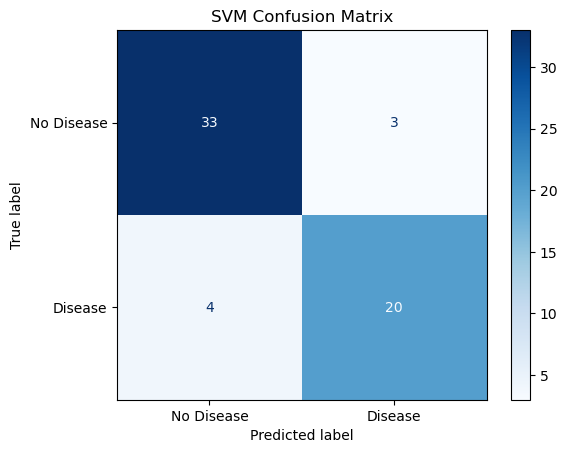

In [6]:
import pandas as pd
import joblib
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the saved SVM model and scaler
svm_model = joblib.load('svm_heart_model.pkl')
scaler = joblib.load('svm_scaler.pkl')

# Reload and prepare the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
cols = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", 
        "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
data = pd.read_csv(url, names=cols, na_values="?").dropna()
data['target'] = data['target'].apply(lambda x: 1 if x > 0 else 0)

# Split the data
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the test features
X_test_scaled = scaler.transform(X_test)

# Predict using the loaded SVM model
y_pred = svm_model.predict(X_test_scaled)

# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Disease", "Disease"])
disp.plot(cmap=plt.cm.Blues)
plt.title("SVM Confusion Matrix")
plt.show()


In [8]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import joblib

# Load and prepare data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
cols = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", 
        "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
data = pd.read_csv(url, names=cols, na_values="?").dropna()
data['target'] = data['target'].apply(lambda x: 1 if x > 0 else 0)

# Features and labels
X = data.drop('target', axis=1)
y = data['target']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning with GridSearchCV (optional but helps increase accuracy)
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid = GridSearchCV(SVC(probability=True), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

# Best model
svm_model = grid.best_estimator_

# Predict
y_pred = svm_model.predict(X_test_scaled)

# Save the model and scaler
joblib.dump(svm_model, 'svm_heart_model_optimized.pkl')
joblib.dump(scaler, 'svm_scaler_optimized.pkl')

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("SVM Model Evaluation:")
print(f"Accuracy:  {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall:    {recall * 100:.2f}%")
print(f"F1 Score:  {f1 * 100:.2f}%")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=["No Disease", "Disease"]))


SVM Model Evaluation:
Accuracy:  90.00%
Precision: 87.50%
Recall:    87.50%
F1 Score:  87.50%

Classification Report:

              precision    recall  f1-score   support

  No Disease       0.92      0.92      0.92        36
     Disease       0.88      0.88      0.88        24

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60

